# Library Imports

In [1]:
!pip install Augmentor
!pip -q install -U tensorflow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 102.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.9 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
fastai 2.8.4 requires fastcore<1.9,>=1.8.0, but you have fastcore 1.11.3 which is incompatible.


In [2]:
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import Augmentor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Global Variables

In [3]:
datasetDict = {
    "train" : {
    },
    "test" : {
    },
    "aug_test": {
            },
    "aug_train": {
    }
}


sourceBase = "/kaggle/input/grape-disease/grape_dataset"
augmentedBase = "/kaggle/working/grape-disease/grape_dataset"

exts = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}


### Usefull Functions

In [4]:
#This function retrieves all directories and file names of images to have them un
def listFiles(path, folder, dictionary):
    fileNames = []
    for d in sorted(path.iterdir()):
        if d.is_dir():
            n = sum(1 for p in d.rglob("*") if p.is_file() and p.suffix.lower() in exts)
            datasetDict[f"{folder}"][f"{d.name}"] = {}
            datasetDict[f"{folder}"][f"{d.name}"]["Quantity"] = n
            print(d.name, ":", n)
        else:
            fileNames.append(d.name)     
    if dictionary != "":
        datasetDict[f"{folder}"][f"{dictionary}"]["Files"] = fileNames



#This function plots images in one grid

def plotImages(base,dictionary, folder):
    for i in range(2,18):
        imgName = datasetDict[f"{dictionary}"][f"{folder}"]["Files"][i]
        img = mpimg.imread(f'/{base}/{dictionary}/{folder}/{imgName}')
        
        plt.subplot(4,4,i-1)
        imgplot = plt.imshow(img)

    plt.suptitle(f"{folder}")
    plt.show()

# Dataset Overiew


In [5]:
listFiles(Path(sourceBase + "/train"), "train","")

Grape___Black_rot : 1888
Grape___Esca_(Black_Measles) : 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 1722
Grape___healthy : 1692


In [6]:
listFiles(Path(sourceBase + "/test"), "test","")

Grape___Black_rot : 472
Grape___Esca_(Black_Measles) : 480
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 430
Grape___healthy : 423


In [7]:
for i in datasetDict["test"]:
    listFiles(Path(sourceBase + f"/test/{i}"), "test", f"{i}")
    listFiles(Path(sourceBase + f"/train/{i}"), "train", f"{i}")

The plots shows we have a balanced number of images for each category

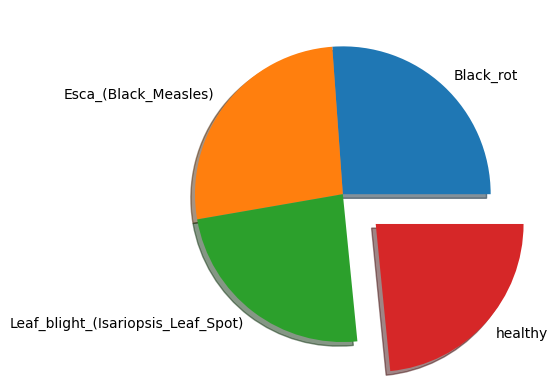

In [8]:
trainFolderTotal = []
trainLabels = []
myexplode = [0, 0, 0, 0.3]
for i in datasetDict["train"]:
    trainFolderTotal.append(datasetDict["train"][f"{i}"].get("Quantity"))
    trainLabels.append(i.replace("Grape___",""))

plt.pie(np.array(trainFolderTotal), labels = trainLabels, explode = myexplode, shadow = True)
plt.show()

We can see by the images and names, that the dataset already uses geometrics transformations for data augmentation. Flipping in all category and rotation only applied in the healthy categorie, knowing this we can explore other augmentation techniques. 

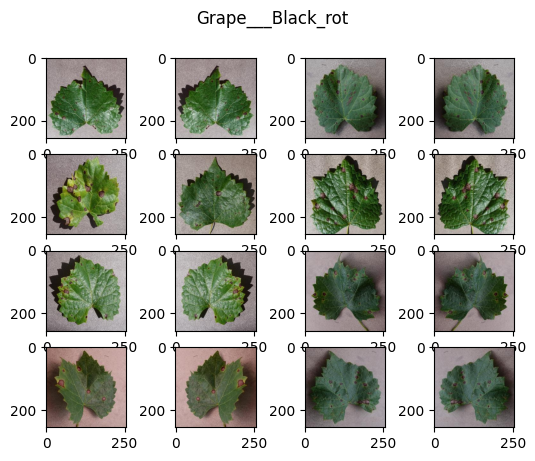

In [9]:
plotImages(sourceBase,"train","Grape___Black_rot")

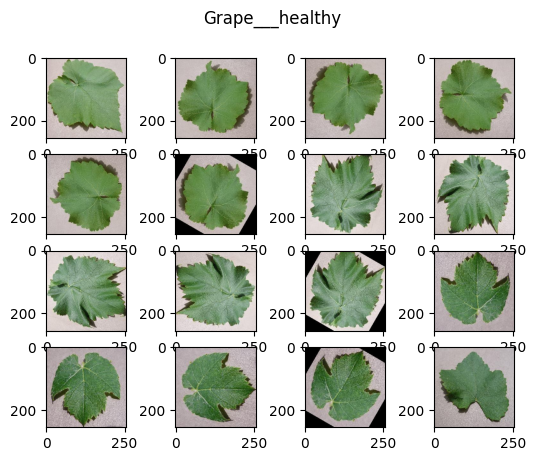

In [10]:
plotImages(sourceBase,"train","Grape___healthy")

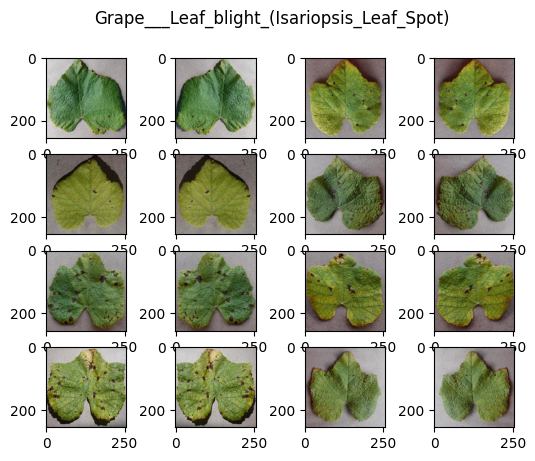

In [11]:
plotImages(sourceBase,"train","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)")

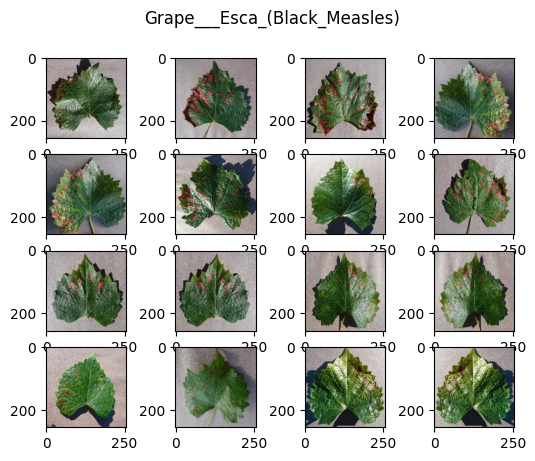

In [12]:
plotImages(sourceBase,"train","Grape___Esca_(Black_Measles)")

# Images Augmentation

In [13]:
for i in datasetDict["train"]:
    source = sourceBase + f"/train/{i}"
    destiny = augmentedBase + f"/aug_train/{i}"
    
    p = Augmentor.Pipeline(source_directory = source, output_directory = destiny)
    
    # Defining augmentation parameters and generating 5000 total images for each category
    p.flip_left_right(0.5)
    p.rotate(0.6, 15, 15)
    p.skew(0.15, 0.2)
    p.zoom(0.3, 1.0, 1.2)
    p.random_brightness(0.4, 0.75, 1.25)
    p.sample(5000)

Initialised with 1888 image(s) found.
Output directory set to /kaggle/working/grape-disease/grape_dataset/aug_train/Grape___Black_rot.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7F56DF47F3B0>: 100%|██████████| 5000/5000 [00:33<00:00, 151.18 Samples/s]                   


Initialised with 1920 image(s) found.
Output directory set to /kaggle/working/grape-disease/grape_dataset/aug_train/Grape___Esca_(Black_Measles).

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7F56DF2338C0>: 100%|██████████| 5000/5000 [00:32<00:00, 153.84 Samples/s]                   


Initialised with 1722 image(s) found.
Output directory set to /kaggle/working/grape-disease/grape_dataset/aug_train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot).

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7F56E53E8170>: 100%|██████████| 5000/5000 [00:33<00:00, 148.75 Samples/s]                   


Initialised with 1692 image(s) found.
Output directory set to /kaggle/working/grape-disease/grape_dataset/aug_train/Grape___healthy.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7F56DF57D820>: 100%|██████████| 5000/5000 [00:32<00:00, 154.11 Samples/s]                   


In [14]:
#Adding the new generater file names to the 
listFiles(Path(augmentedBase + "/aug_train"), "aug_train","")

Grape___Black_rot : 5000
Grape___Esca_(Black_Measles) : 5000
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) : 5000
Grape___healthy : 5000


In [15]:
for i in datasetDict["aug_train"]:
    listFiles(Path(augmentedBase + f"/aug_train/{i}"), "aug_train", f"{i}")
    #listFiles(Path(augmentedBase + f"/aug_train/{i}"), "aug_test", f"{i}")

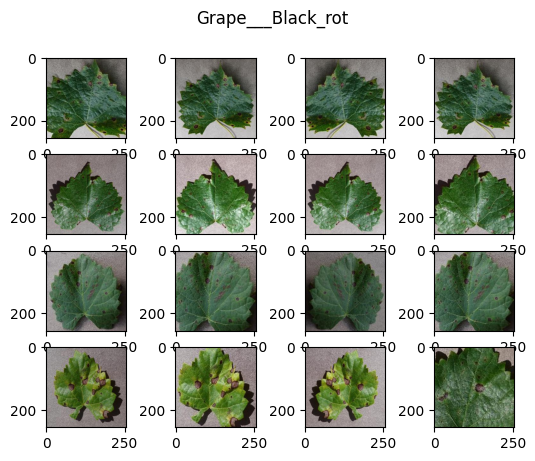

In [16]:
plotImages(augmentedBase,"aug_train","Grape___Black_rot")

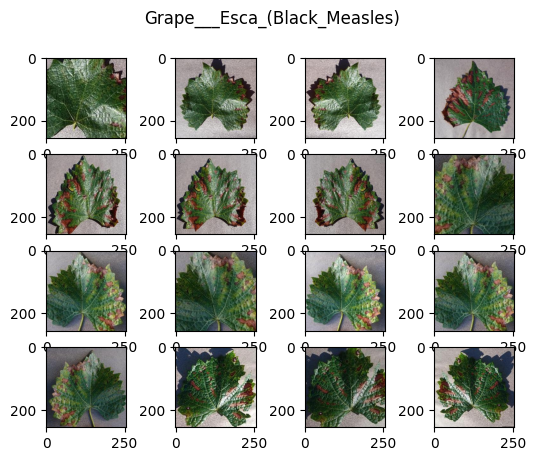

In [17]:
plotImages(augmentedBase,"aug_train","Grape___Esca_(Black_Measles)")

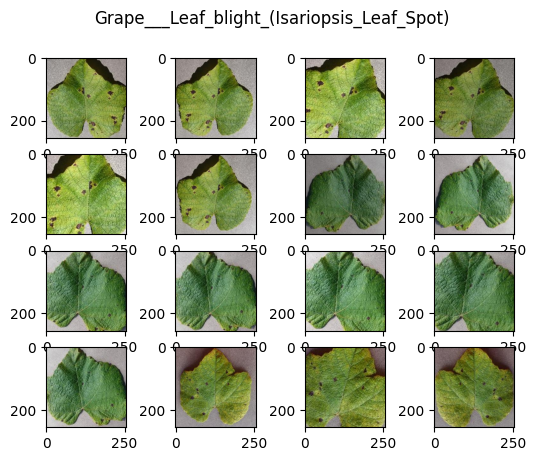

In [18]:
plotImages(augmentedBase,"aug_train","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)")

# Model Training

In [19]:
classes = sorted(i for i in datasetDict["train"])
classes    

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [20]:
IMG_SIZE = (300, 300)   
BATCH_SIZE = 32
SEED = 1337

In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    augmentedBase + "/aug_train",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    augmentedBase + "/aug_train",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)
print("Class names:", class_names)
print("Num classes:", NUM_CLASSES)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)

Found 20000 files belonging to 4 classes.
Using 16000 files for training.


2026-01-29 10:55:25.719544: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 20000 files belonging to 4 classes.
Using 4000 files for validation.
Class names: ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy']
Num classes: 4


In [22]:
base = tf.keras.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,),
    pooling="avg"
)
base.trainable = False  # start simple: freeze backbone

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet_v2.preprocess_input(inputs)
x = base(x, training=False)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-s (Functional)   │ (None, 1280)           │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,336,484 (77.58 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_effnetv2s.keras", monitor="val_accuracy", save_best_only=True),
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2,
    callbacks=callbacks
)

Epoch 1/2
157/500 ━━━━━━━━━━━━━━━━━━━━ 33:43 6s/step - accuracy: 0.7632 - loss: 0.7445

In [ ]:
# true labels
y_true = np.concatenate([y.numpy() for _, y in val_ds], axis=0)

# predicted labels
y_prob = model.predict(val_ds)
y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))